<a href="https://colab.research.google.com/github/kvs1998/Practical-Deep-Learning-for-Coders-v3/blob/main/lesson02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download Images

In [2]:
from fastai import *
from fastai.vision import *

In [4]:
classes = ['tiger','lion']

In [9]:
folder = 'tiger'
file = '/content/tiger.txt'

In [13]:
folder = 'lion'
file = '/content/lion.txt'

In [15]:
path = Path('data/lion')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [16]:
path.ls()

[PosixPath('data/lion/lion')]

In [17]:
download_images(path/file, dest, max_pics=200)

In [18]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

tiger
lion


### Verify Data

In [22]:
from fastai.vision.data import ImageDataBunch
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=3)

/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  return _solve_func(B,A)[0][:,0]
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if 

In [24]:
path.ls()

[PosixPath('data/lion/tiger'), PosixPath('data/lion/lion')]

In [25]:
data.classes

['lion']

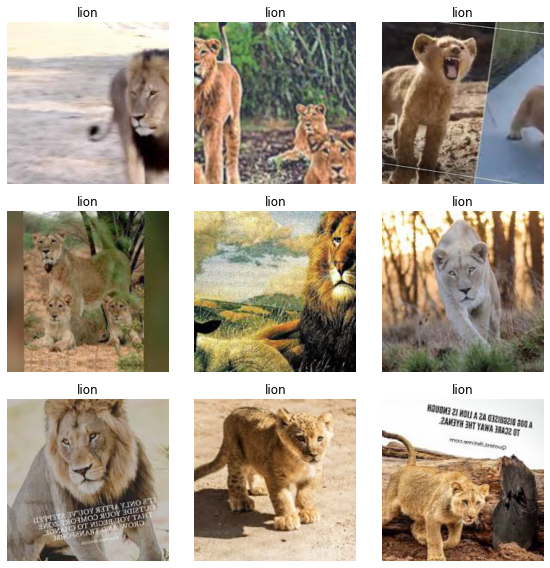

In [27]:
data.show_batch(rows=3, figsize=(8,8))